# Project 3 part 1
- Daniel Barella
-1/25/23

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#from sqlalchemy import create_engine 
#import pymysgl 
#pymysql.install_as_MySQLdb ()



In [2]:
# example making new folder with os
import os
os.makedirs('Data/',exist_ok=True) 
# Confirm folder created
os.listdir("Data/")

['title_basics.csv.gz', 'title_akas.csv.gz', 'title_ratings.csv.gz']

In [3]:
## Change username and password to match your personal MySOL Server settings
#username = 'root' # default username for MySOL db is root
#password = '???' # whatever password you chose during MySQL installation.
#connection = f'mysal+pymysal://{username}:{password}alocalhost/Chinook'
#engine = create_engine (connection)

In [4]:
# title_basics = 'https://datasets.imdbws.com/title.basics.tsv.gz'
# title_akas = 'https://datasets.imdbws.com/title.akas.tsv.gz'
# title_ratings = 'https://datasets.imdbws.com/title.ratings.tsv.gz'

In [5]:
#basics = pd.read_csv(title_basics, sep='\t', low_memory=False)


In [6]:
#akas = pd.read_csv(title_akas, sep='\t', low_memory=False)


In [7]:
#ratings = pd.read_csv(title_ratings, sep='\t', low_memory=False)

In [8]:
#basics.to_csv("Data/title_basics.csv.gz",compression='gzip',index=False)

In [9]:
basics = pd.read_csv("Data/title_basics.csv.gz", low_memory = False)
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [10]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9556833 entries, 0 to 9556832
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 656.2+ MB


In [11]:
#akas.to_csv("Data/title_akas.csv.gz",compression='gzip',index=False)

In [12]:
akas = pd.read_csv("Data/title_akas.csv.gz", low_memory = False)
akas.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [13]:
#ratings.to_csv("Data/title_ratings.csv.gz",compression='gzip',index=False)

In [14]:
ratings = pd.read_csv("Data/title_ratings.csv.gz", low_memory = False)
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1944
1,tt0000002,5.8,263
2,tt0000003,6.5,1769
3,tt0000004,5.6,179
4,tt0000005,6.2,2579


# Business Problem

For this project, you have been hired to produce a MySQL database on Movies from a subset of IMDB's publicly available dataset. Ultimately, you will use this database to analyze what makes a movie successful and will provide recommendations to the stakeholder on how to make a successful movie.

Over the course of this project, you will:

- Part 1: Download several files from IMDB’s movie data set and filter out the subset of moves requested by the stakeholder.
- Part 2: Use an API to extract box office revenue and profit data to add to your IMDB data and perform exploratory data analysis.
- Part 3: Construct and export a MySQL database using your data.
- Part 4: Apply hypothesis testing to explore what makes a movie successful.
- Part 5 (Optional): Produce a Linear Regression model to predict movie performance.

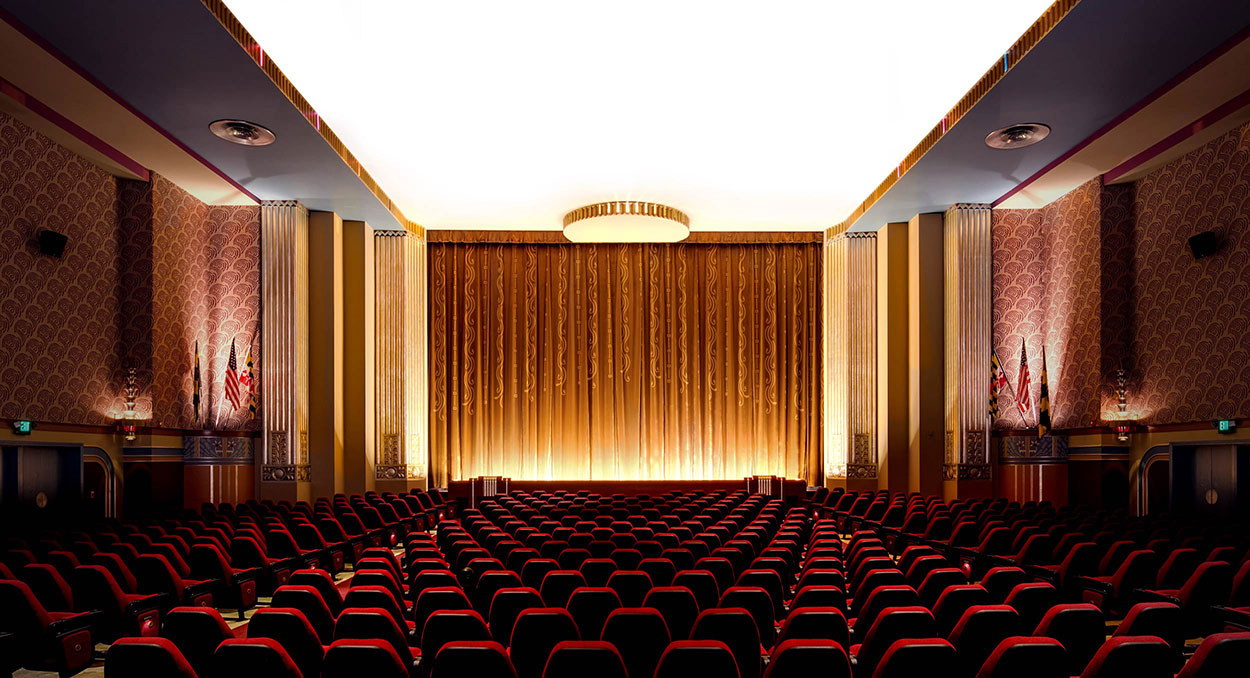

For Part 1 of the project, you will be creating your project repository, loading the official IMDB data for the requested tables, filtering out unnecessary data, and saving the filtered tables as gzip-compressed csv files (".csv.gz") in your repository.

## The Data

IMDB Provides Several Files with varied information for Movies, TV Shows, Made for TV Movies, etc.

- Overview/Data Dictionary: https://www.imdb.com/interfaces/
- Downloads page: https://datasets.imdbws.com/
From their previous research, they realized they want to focus on the following files:

 - title.basics.tsv.gz
 - title.ratings.tsv.gz
 - title.akas.tsv.gz

IMDb Datasets
- Subsets of IMDb data are available for access to customers for personal and non-commercial use. You can hold local copies of this data, and it is subject to our terms and conditions. Please refer to the Non-Commercial Licensing and copyright/license and verify compliance.


IMDb Dataset Details

- Each dataset is contained in a gzipped, tab-separated-values (TSV) formatted file in the UTF-8 character set. The first line in each file contains headers that describe what is in each column. A ‘\N’ is used to denote that a particular field is missing or null for that title/name. The available datasets are as follows:

title.akas.tsv.gz - Contains the following information for titles:

- titleId (string) - a tconst, an alphanumeric unique identifier of the title
- ordering (integer) – a number to uniquely identify rows for a given titleId
- title (string) – the localized title
- region (string) - the region for this version of the title
- language (string) - the language of the title
- types (array) - Enumerated set of attributes for this alternative title. One or more of the following: "alternative", "dvd", "festival", "tv", "video", "working", "original", "imdbDisplay". New values may be added in the future without warning
- attributes (array) - Additional terms to describe this alternative title, not enumerated
- isOriginalTitle (boolean) – 0: not original title; 1: original title
  - title.basics.tsv.gz - Contains the following information for titles:
- tconst (string) - alphanumeric unique identifier of the title
- titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
- primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
- originalTitle (string) - original title, in the original language
- isAdult (boolean) - 0: non-adult title; 1: adult title
- startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
- endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
  - runtimeMinutes – primary runtime of the title, in minutes
- genres (string array) – includes up to three genres associated with the title
  - title.crew.tsv.gz – Contains the director and writer information for all the titles in IMDb. Fields include:
- tconst (string) - alphanumeric unique identifier of the title
- directors (array of nconsts) - director(s) of the given title
- writers (array of nconsts) – writer(s) of the given title
  - title.episode.tsv.gz – Contains the tv episode information. Fields include:
- tconst (string) - alphanumeric identifier of episode
- parentTconst (string) - alphanumeric identifier of the parent TV Series
- seasonNumber (integer) – season number the episode belongs to
- episodeNumber (integer) – episode number of the tconst in the TV series
  - title.principals.tsv.gz – Contains the principal cast/crew for titles
- tconst (string) - alphanumeric unique identifier of the title
- ordering (integer) – a number to uniquely identify rows for a given titleId
- nconst (string) - alphanumeric unique identifier of the name/person
- category (string) - the category of job that person was in
- job (string) - the specific job title if applicable, else '\N'
- characters (string) - the name of the character played if applicable, else '\N'
  - title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles
- tconst (string) - alphanumeric unique identifier of the title
  - averageRating – weighted average of all the individual user ratings
  - numVotes - number of votes the title has received
  - name.basics.tsv.gz – Contains the following information for names:
- nconst (string) - alphanumeric unique identifier of the name/person
- primaryName (string)– name by which the person is most often credited
- birthYear – in YYYY format
- deathYear – in YYYY format if applicable, else '\N'
- primaryProfession (array of strings)– the top-3 professions of the person
- knownForTitles (array of tconsts) – titles the person is known for

## Specifications

Your stakeholder only wants you to include information for movies based on the following specifications:

- Exclude any movie with missing values for genre or runtime
- Include only full-length movies (titleType = "movie").
- Include only fictional movies (not from documentary genre)
- Include only movies that were released 2000 - 2021 (include 2000 and 2021)
- Include only movies that were released in the United States

## Deliverable

After filtering out movies that do not meet the stakeholder's specifications:

- Before saving, run a final .info() for each of the dataframes to show a summary of how many movies remain and the datatypes of each feature
- Save each file to a compressed csv file "Data/" folder inside your repository.
- Commit your changes to your repository in GitHub desktop and Publish repository / Push Changes.
- Submit the link to your repository

## Required Preprocessing - Details

Filtering/Cleaning Steps:
- Title Basics:
  - Replace "\N" with np.nan
  - Eliminate movies that are null for runtimeMinutes
  - Eliminate movies that are null for genre
  - keep only titleType==Movie
  - keep startYear 2000-2022
  - Eliminate movies that include "Documentary" in genre (see tip below)
  - Keep only US movies (Use AKAs table, see "Filtering one dataframe based on another" section below)
- AKAs:
 - keep only US movies.
 - Replace "\N" with np.nan
- Ratings:
 - Replace "\N" with np.nan (if any)
 - Keep only US movies (Use AKAs table, see "Filtering one dataframe based on another" section below)

## Title Basics:

1. Replace "\N" with np.nan


In [15]:
basics = basics.replace({'\\N':np.nan})

2. Eliminate movies that are null for runtimeMinutes


In [16]:
basics.dropna(subset=["runtimeMinutes"], inplace=True)

3. Eliminate movies that are null for genre


In [17]:
basics.dropna(subset=["genres"], inplace=True)

4. keep only titleType==Movie

In [18]:
basics = basics[basics['titleType'] == 'movie']

5. keep startYear 2000-2022


In [19]:
basics.dropna(subset=["startYear"], inplace=True)

In [20]:
basics['startYear'] = pd.to_numeric(basics['startYear'], errors='coerce')

In [21]:
basics = basics.query("startYear >= 2000 and startYear <= 2022")

6. Eliminate movies that include "Documentary" in genre (see tip below)


In [22]:
# Exclude movies that are included in the documentary category.
is_documentary = basics['genres'].str.contains('documentary',case=False)
basics = basics[~is_documentary]

7. Keep only US movies (Use AKAs table, see "Filtering one dataframe based on another" section below)


In [23]:
# Filter the basics table down to only include the US by using the filter akas dataframe
keepers =basics['tconst'].isin(akas['titleId'])
keepers

34803      True
61116      True
67669      True
77964      True
86801      True
           ... 
9556506    True
9556515    True
9556554    True
9556599    True
9556683    True
Name: tconst, Length: 146202, dtype: bool

In [24]:
basics = basics[keepers]
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
34803,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118,"Comedy,Fantasy,Romance"
61116,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020,NaN,70,Drama
67669,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NaN,122,Drama
77964,tt0079644,movie,November 1828,November 1828,0,2001,NaN,140,"Drama,War"
86801,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005,NaN,100,"Comedy,Horror,Sci-Fi"
...,...,...,...,...,...,...,...,...,...
9556506,tt9916170,movie,The Rehearsal,O Ensaio,0,2019,NaN,51,Drama
9556515,tt9916190,movie,Safeguard,Safeguard,0,2020,NaN,95,"Action,Adventure,Thriller"
9556554,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,NaN,84,Thriller
9556599,tt9916362,movie,Coven,Akelarre,0,2020,NaN,92,"Drama,History"


8. Drop 'endYear'

In [25]:
basics = basics.drop(labels='endYear', axis=1)

## AKAs:

1. Replace "\N" with np.nan


In [26]:
akas = akas.replace({'\\N':np.nan})

2. keep only US movies.

In [27]:
akas = akas.loc[akas['region']=='US']

## Ratings:

1. Replace "\N" with np.nan (if any)


In [28]:
ratings = ratings.replace({'\\N':np.nan})

2. Keep only US movies (Use AKAs table, see "Filtering one dataframe based on another" section below)

In [29]:
keepers =ratings['tconst'].isin(akas['titleId'])
keepers

0           True
1           True
2          False
3          False
4           True
           ...  
1272080    False
1272081    False
1272082    False
1272083    False
1272084    False
Name: tconst, Length: 1272085, dtype: bool

In [30]:
ratings = ratings[keepers]
ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,1944
1,tt0000002,5.8,263
4,tt0000005,6.2,2579
5,tt0000006,5.1,177
6,tt0000007,5.4,809
...,...,...,...
1272058,tt9916200,8.2,220
1272059,tt9916204,8.2,251
1272065,tt9916348,8.5,17
1272066,tt9916362,6.4,5136


In [31]:
basics.to_csv("Data/title_basics.csv.gz", mode='w', header=False,compression='gzip')

In [32]:
basics = pd.read_csv("Data/title_basics.csv.gz", low_memory = False)
basics.head()

,34803,tt0035423,movie,Kate & Leopold,Kate & Leopold.1,0,2001,118,"Comedy,Fantasy,Romance"
0,61116,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020,70,Drama
1,67669,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,122,Drama
2,77964,tt0079644,movie,November 1828,November 1828,0,2001,140,"Drama,War"
3,86801,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005,100,"Comedy,Horror,Sci-Fi"
4,87114,tt0089067,movie,El día de los albañiles 2,El día de los albañiles 2,0,2001,90,Comedy


In [33]:
akas.to_csv("Data/title_akas.csv.gz", mode='w', header=False,compression='gzip')

In [34]:
akas = pd.read_csv("Data/title_akas.csv.gz", low_memory = False)
akas.head()

,5,tt0000001,6,Carmencita,US,Unnamed: 5,imdbDisplay,Unnamed: 7,0
0,14,tt0000002,7,The Clown and His Dogs,US,NaN,NaN,literal English title,0.0
1,33,tt0000005,10,Blacksmith Scene,US,NaN,imdbDisplay,NaN,0.0
2,36,tt0000005,1,Blacksmithing Scene,US,NaN,alternative,NaN,0.0
3,41,tt0000005,6,Blacksmith Scene #1,US,NaN,alternative,NaN,0.0
4,42,tt0000005,7,Blacksmithing,US,NaN,NaN,informal alternative title,0.0


In [36]:
ratings.to_csv("Data/title_ratings.csv.gz", mode='w', header=False,compression='gzip')

In [37]:
ratings = pd.read_csv("Data/title_ratings.csv.gz", low_memory = False)
ratings.head()

,0,tt0000001,5.7,1944
0,1,tt0000002,5.8,263
1,4,tt0000005,6.2,2579
2,5,tt0000006,5.1,177
3,6,tt0000007,5.4,809
4,7,tt0000008,5.4,2088


In [38]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145552 entries, 0 to 145551
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   34803                   145552 non-null  int64 
 1   tt0035423               145552 non-null  object
 2   movie                   145552 non-null  object
 3   Kate & Leopold          145552 non-null  object
 4   Kate & Leopold.1        145552 non-null  object
 5   0                       145552 non-null  int64 
 6   2001                    145552 non-null  int64 
 7   118                     145552 non-null  int64 
 8   Comedy,Fantasy,Romance  145552 non-null  object
dtypes: int64(4), object(5)
memory usage: 10.0+ MB


In [39]:
akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408555 entries, 0 to 1408554
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   5            1408555 non-null  int64  
 1   tt0000001    1408555 non-null  object 
 2   6            1408555 non-null  int64  
 3   Carmencita   1408555 non-null  object 
 4   US           1408555 non-null  object 
 5   Unnamed: 5   3793 non-null     object 
 6   imdbDisplay  970576 non-null   object 
 7   Unnamed: 7   45822 non-null    object 
 8   0            1407210 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 96.7+ MB


In [40]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486214 entries, 0 to 486213
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   0          486214 non-null  int64  
 1   tt0000001  486214 non-null  object 
 2   5.7        486214 non-null  float64
 3   1944       486214 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 14.8+ MB
